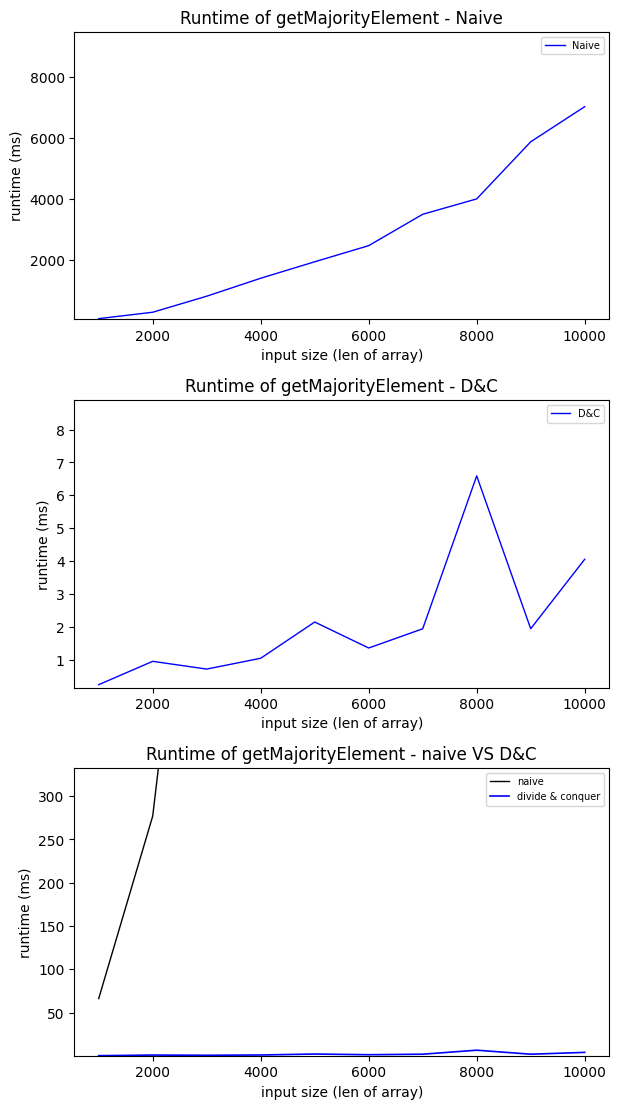

In [7]:
from time import time
import matplotlib.pyplot as plt
from random import randint
#from math import floor, ceil, log2
########################### Exercise 1 ###########################

def naive(A):
    """Finds the majority element of A in a naive way. DO NOT CHANGE"""
    majority_element = None
    for i in range(len(A)):
        element = A[i]
        element_count = 0
        for j in range(i, len(A)):
            if A[j] == element:
                element_count += 1
                if element_count > len(A) // 2:
                    majority_element = element
    return majority_element

def is_majority(A, element):
    """Tells if 'element' is the majority element in A"""
    if element == None or A == None:
        return False
    n = len(A)
    if n == 0:
        return False
    if n == 1:
        return element == A[0]
    anc = n // 2 + 1  # * anc := appearence number constraint. number of times it must appear to be the majority element
    i, crt_an = 0, 0  # * current appearence number
    for el in A:
        if el == element:
            crt_an += 1
            if crt_an >= anc:
                return True
    else:
        return False

def reduce(A):
    """Reduces A in at most len(A) // 2 parts using pair-wise votes"""
    n = len(A)
    if n <= 1: return A  # * If A is empty or a singleton => result will be A itself
    A_prime = []
    for i in range(0, n-1, 2):
        a, b = A[i], A[i+1]
        if a == b: A_prime.append(a)
    return A_prime

def dandc(A):
    """Divide and Conquer algorithm"""
    if not A: return None
    n = len(A)
    if n == 0: return None
    if n == 1: return A[0]
    def dandc_rec(A_prime):
        l = len(A_prime) 
        if l == 1: return A_prime[0]
        if l == 0: return None
        if l % 2 == 1:
            rand_el = A[-1]
            if is_majority(A, rand_el): return rand_el
            else: A.remove(rand_el)  # Now l is even
        return dandc_rec(reduce(A_prime))
    candidate = dandc_rec(A)
    return candidate if is_majority(A, candidate) else None

def randEl():
    # 50% for 0 & 50% for [1-9]
    el = randint(0, 1)
    return el if el == 0 else randint(1, 9)
    # random=> uniform distrib => 50% chance getting 1 i.e. any of [1-9] and 50% chance getting 0

def fillRandArray(n: int):
    """Return list of n elements generated by randEl()"""
    return [randEl() for _ in range(n)]

def fillRandArrays(ns):
    return [fillRandArray(n) for n in ns]

def runtime(f, args, unpack: bool = True, needs_use_of_timeit: bool = False):
    """ Takes a function f and an argument arg, and returns the time (in ms) it takes to run f(arg)
    f: the function to be timed
    args: the arguments to pass to the function
    useTimeIt: For Exp the delta in runtimes is too short and oftens ends up being 0. 
                Since the problem seemed to be really common among everyone, and that implementing a timing function 
                is not really the goal of this TP, I decided to use the library timeit to solve that problem.
    """
    if needs_use_of_timeit:
        from timeit import timeit
        num = 1 #* number of time code is executed. Higher num-value means statistics more relevant and closer to reality 
        #delta_time = timeit(lambda: f(*arg), number=num) * (1000/num) if unpack else timeit(lambda: f(arg), number=num) * (1000/num)
        return  timeit(lambda: f(*args), number=num) * (1000/num) if unpack else timeit(lambda: f(args), number=num) * (1000/num) 
        #* *1000 to convert to ms.

    else:
        before = time()
        f(*args) if (unpack) else f(args)
        after = time()
        delta_time = after - before
        return delta_time
    #!
    #! DELTA TIME IS TOO SHORT => ALMOST ALWAYS GETS DEFAULTED TO 0
    #! => need to use library timeit
    #!
   

def runtime_arr(f, argArray, unpack: bool = True, needs_use_of_timeit: bool = False): 
    """ 
    See "runtime()" function above for explaination
    """
    return [runtime(f, arg, unpack, needs_use_of_timeit) for arg in argArray]

def plotVS(subp_idx, plot_x, plot_f1, plot_f2, title: str, xlabel: str, ylabel: str, f1Label: str, f2Label: str):
    """Plots two functions against each other.  
    - plot_x: the x-axis values
    - plot_f1: the y-values of the first function
    - plot_f2: the y-values of the second function
    - title: the title of the plot
    - xlabel: the label of the x-axis
    - ylabel: the label of the y-axis
    - f1Label: the label of the first function
    - f2Label: the label of the second function
    """
    plt.subplot(3,1, subp_idx)
    plt.tight_layout()
    plt.title(title)
    m1, m2, gap = min(plot_f2), min(plot_f1[1:]), 0.2
    plt.ylim(m1 - gap * m1, m2 + gap * m2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(plot_x, plot_f1, '-k', label=f1Label, linewidth=1)
    plt.plot(plot_x, plot_f2, '-b', label=f2Label, linewidth=1.2)
    plt.legend(prop={'size': 7})
    plt.legend(fontsize=7)

def plot_solo(subp_idx, plot_x, plot_f, title: str, xlabel: str, ylabel: str, fLabel: str):
    """Plots two functions against each other.  
    - plot_x: the x-axis values
    - plot_f: the y-values of the function
    - title: the title of the plot
    - xlabel: the label of the x-axis
    - ylabel: the label of the y-axis
    - fLabel: the label of the function
    """
    plt.subplot(3, 1, subp_idx)
    plt.tight_layout(pad=5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    m, M, gap = min(plot_f), max(plot_f), 0.35
    plt.ylim(m - gap*m, M + gap*M)
    plt.plot(plot_x, plot_f, '-b', label=fLabel, linewidth=1)
    plt.legend(prop={'size': 7})
    plt.legend(fontsize=7)

def compare_naiv_and_dandc():
    """Compare runtimes  of  the  naive  and  D&C  algorithms  using  matplotlib"""
    plot_x = list(range(1000, 11000, 1000))
    args = fillRandArrays(plot_x) #[[fillRandArray(n)] for n in range(1000, 110000, 1000)] #
    titles = ["Runtime of getMajorityElement - Naive", "Runtime of getMajorityElement - D&C", "Runtime of getMajorityElement - naive VS D&C"]
    xlabel, ylabel = "input size (len of array)", "runtime (ms)"
    plot_y_naive =  runtime_arr(naive, args, unpack=False, needs_use_of_timeit=True)
    plot_y_dandc = runtime_arr(dandc, args, unpack=False, needs_use_of_timeit=True)
    plt.figure().set_figheight(11)
    plot_solo(1, plot_x, plot_y_naive, titles[0], xlabel, ylabel, "Naive")
    plot_solo(2, plot_x, plot_y_dandc, titles[1], xlabel, ylabel, "D&C")
    plotVS(3, plot_x, plot_y_naive, plot_y_dandc, titles[2], xlabel, ylabel, "naive", "divide & conquer")
# TODO: Uncomment to see comparison

compare_naiv_and_dandc()